## `lab12`—Optimizing over Time

❖ Objectives

-   Understand the effect of code structure and algorithm choice on code run time.

### Relative Efficiency

Since there are many ways to solve most problems in computational science, let's investigate one such case.  If you have a list of objects and need to find duplicates, how would you go about it?  Naïvely, you can simply search through the list, comparing each object to each other and accruing the duplicates to a list.

In [ ]:
numbers = [12, 15, 12, 2, 6, 7, 1, 2, 2]
duplicates = []

for i in range(0, len(numbers)):  # note that we are making the range explicit here
    for j in range(0, len(numbers)):
        if i == j:  # don't compare numbers[0] to numbers[0], etc.
            continue
        if numbers[i] == numbers[j]:
            duplicates.append(numbers[j])

print(duplicates)

That turns out to be overkill for this problem:  each case of a duplicate numbers sees the other as well, so you see pairs of duplicates rather than just the duplicate numbers.  (That is, we want the list `duplicates` to contain only `[12, 2]` rather than `[12, 12, 2, 2, 2, 2, 2, 2]`.

-   Compose a function `find_duplicates` which accepts a list `values`.  The function `find_duplicates` should return only the numbers which have duplicates (and only one of each).  Use the code above (without modifying the algorithm); you will also need a comparison of the type
        
        values[j] not in duplicates
    
    to catch multiple duplicates.

In [71]:
# Write your function here.  This includes any necessary import statements.
def find_duplicates(values):
    duplicates = []
    
    for i in range(0, len(values)):
        for j in range(0, len(values)):
            if i == j:
                continue
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates

In [72]:
# it should pass this test---do NOT edit this cell
from nose.tools import assert_equal

test_values = ['a', 'a', 'b', 'd', 'a', 'b', 'c', 'd', 'a']
test_result = find_duplicates(test_values)
assert_equal(type(test_result), list, msg="\nYour function doesn't return a list.")
assert_equal(len(test_result), 3, msg="\nYour function does not return the correct number of duplicate items.")
assert_equal(test_result, ['a', 'b', 'd'], msg="\nYour function returns the wrong items as duplicates.")

print('All tests passed successfully.')
print(test_result)

All tests passed successfully.
['a', 'b', 'd']


A simple optimization can be made to improve this code, particularly for large lists.  We are comparing each value to all others, *even the ones that have already been checked*.  This means that in many cases, we already know that something is a duplicate.  In graphical form, we are doing this:

<img src="./img/duplicate-all.png" width="40%;" />

when we could be doing this:

<img src="./img/duplicate-half.png" width="40%;" />

because we *already checked* the previous (left-hand) values for duplicateness.

The relevant change:  switch the range of the `j` loop from `(0, len(values))` to `(i+1, len(values))`.

-   Compose a new function `better_find_duplicates` which makes this change.

In [73]:
# Write your function here.  This includes any necessary import statements.
def better_find_duplicates(values):
    duplicates = []
    
    for i in range(0, len(values)):
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates

In [74]:
# it should pass this test---do NOT edit this cell
from nose.tools import assert_equal

test_values = ['a', 'a', 'b', 'd', 'a', 'b', 'c', 'd', 'a']
test_result = better_find_duplicates(test_values)
assert_equal(type(test_result), list, msg="\nYour function doesn't return a list.")
assert_equal(len(test_result), 3, msg="\nYour function does not return the correct number of duplicate items.")
assert_equal(test_result, ['a', 'b', 'd'], msg="\nYour function returns the wrong items as duplicates.")

print('All tests passed successfully.')

All tests passed successfully.


What we intend to do now is compare the relative speeds of these two functions for large sets of data.  A reasonable hypothesis is that the second function, `better_find_duplicates`, is twice as fast as `find_duplicates`, since it requires only half as many tests.  We'll see if we can confirm or discard this guess.

There are a few good ways to time code in Python.  You saw `time.time` in the lecture—it returns the current computer time, which we can use before and after a process.  A more automatic way is the `%timeit` command, which is explicitly designed to test functions repeatedly and report their run time.  (The percent sign in front means that this is a Jupyter notebook command, rather than a specifically Python command.)

In [75]:
trial_values1 = list(range(16))*2
print(trial_values1)
%timeit find_duplicates(trial_values1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
1000 loops, best of 3: 123 µs per loop


`%timeit` runs your code many times and reports the shortest run time from that set.  (This may be affected by other programs running on your computer as well.)

In [76]:
print(trial_values1)
%timeit better_find_duplicates(trial_values1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
10000 loops, best of 3: 62.2 µs per loop


On my machine, I had the following results:

| function | best time |
|----------|-----------|
| `find_duplicates` | 133 µs |
| `better_find_duplicates` | 57.6 µs |

$57.6/133 = 0.433$—that's pretty close to twice as fast (half the time), and we could reasonably expect that to improve as the data set becomes larger.  (Ideal behavior is often achieved with larger data sets since there is additional overhead from the function call and return which becomes a smaller proportion of bigger problems.)

Let's use a bigger data set.

In [77]:
trial_values2 = [5] * 1000
%timeit find_duplicates(trial_values2)
%timeit better_find_duplicates(trial_values2)

1 loop, best of 3: 175 ms per loop
10 loops, best of 3: 65.4 ms per loop


Note that `%timeit` (rather intelligently) opts for fewer loops since each loop is more intensive.  In this case, my loop behavior improves to  $103/204 \approx 0.505$.

It can be shown that performance in this algorithm also increases when the list is sorted first (we assume that the sorting only need happen once).

-   Compose a function `sorted_find_duplicates` which performs exactly as `better_find_duplicates`, except that `values` is sorted before the search is made.  (You may use `values.sort()`, which modifies the list in-place.)

In [78]:
# Write your function here.  This includes any necessary import statements.
def sorted_find_duplicates(values):
    duplicates = []
    
    values.sort()
    for i in range(0, len(values)):
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates

In [79]:
# it should pass this test---do NOT edit this cell
from nose.tools import assert_equal

test_values = ['a', 'a', 'b', 'd', 'a', 'b', 'c', 'd', 'a']
test_result = sorted_find_duplicates(test_values)
assert_equal(type(test_result), list, msg="\nYour function doesn't return a list.")
assert_equal(len(test_result), 3, msg="\nYour function does not return the correct number of duplicate items.")
assert_equal(test_result, ['a', 'b', 'd'], msg="\nYour function returns the wrong items as duplicates.")

print('All tests passed successfully.')

All tests passed successfully.


Now we'll try all three functions thus far—`find_duplicates`, `better_find_duplicates`, and `sorted_find_duplicates`—on a large random list.

In [80]:
import numpy.random as npr
trial_values3 = npr.randint(0,10,size=1000)
print(trial_values3)
%timeit find_duplicates(trial_values3)
%timeit better_find_duplicates(trial_values3)
%timeit sorted_find_duplicates(trial_values3)

[5 2 4 4 9 7 1 7 5 7 0 6 4 0 2 9 6 9 0 5 8 8 9 1 8 7 8 9 2 0 3 9 9 2 7 4 1
 7 6 8 3 3 4 3 4 1 5 1 4 7 1 4 8 2 7 0 9 4 6 0 3 0 9 5 6 9 8 6 7 9 1 6 8 7
 3 2 6 8 0 1 5 3 3 7 8 6 0 7 9 7 7 6 2 6 6 1 6 9 5 7 8 4 8 6 7 0 4 0 7 5 7
 9 3 6 9 0 6 5 6 3 6 6 9 7 8 1 4 7 2 0 7 1 0 0 4 3 1 6 1 9 0 3 0 0 1 3 2 0
 2 0 3 6 0 5 7 8 6 3 1 9 3 9 1 3 5 7 5 7 1 2 8 5 7 0 1 7 1 3 6 0 9 6 5 4 4
 3 2 8 7 4 9 7 7 4 3 2 7 7 6 9 8 0 1 6 0 3 5 7 1 1 3 5 6 4 1 9 3 7 1 7 6 0
 8 5 5 8 2 3 9 9 3 4 2 1 2 9 5 6 9 4 7 3 5 4 4 9 1 4 6 7 7 4 8 9 3 3 4 4 6
 3 6 7 7 5 0 3 4 3 1 0 4 8 4 0 2 5 0 6 6 8 0 8 6 9 1 4 8 7 3 5 5 0 1 4 5 5
 9 4 2 2 5 6 2 6 6 6 1 3 1 1 9 4 6 7 5 0 0 0 9 2 5 5 4 7 4 0 5 6 7 1 7 2 8
 9 0 7 1 2 0 3 8 2 7 5 4 1 9 0 3 0 3 8 7 8 9 4 1 6 0 9 8 0 9 1 5 1 8 9 4 4
 9 4 8 7 2 1 4 6 5 8 2 4 5 3 7 9 0 1 7 7 1 1 2 8 9 4 2 5 4 6 3 4 2 9 9 9 3
 6 8 8 9 3 1 7 6 0 6 1 0 5 4 5 6 3 1 1 1 5 8 7 1 8 9 9 5 9 0 9 6 1 7 1 7 9
 8 0 2 1 6 0 8 2 2 2 6 9 5 6 8 2 0 1 3 1 0 7 4 4 1 1 2 6 7 0 1 5 6 7 8 3 4
 9 9 5 8 9 0 2 7 6 8 9 7 

Notice the pause after the first two runs of `%timeit`—this is the list being sorted during the first trial run of `sorted_find_duplicates`.  My performance is marginally better, on the order of $2\%$ in this case.

A very great improvement can often be achieved by moving from Python to C—in this case, NumPy, which has much of its actual numerical code written in the very efficient C language.

C is a *compiled* language, meaning that the code is converted directly into machine language before being run.  This gives it a great deal of power and efficiency, which is why many numerical applications are written in C.

In [81]:
# although demonstrative, this is not a particularly efficient code
import numpy as np

def numpy_find_duplicates(values):
    duplicates = []
    values = np.array(values)
    values.sort()
    for i in range(0, len(values)):  # note that we are making the range explicit here
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates

In [82]:
import numpy.random as npr
trial_values3 = npr.randint(0,10,size=1000)
print(trial_values3)
%timeit find_duplicates(trial_values3)
%timeit better_find_duplicates(trial_values3)
%timeit sorted_find_duplicates(trial_values3)
%timeit numpy_find_duplicates(trial_values3)  # note that sorting has already taken place as well

[7 8 4 3 7 7 9 7 5 3 3 9 2 9 9 7 5 4 6 3 9 2 6 7 0 7 4 2 8 4 2 7 7 2 9 9 9
 6 6 8 5 5 1 7 0 8 0 0 8 5 3 1 0 8 1 2 8 2 2 4 9 6 9 0 0 2 1 4 6 7 0 0 3 8
 0 3 6 1 6 7 5 4 4 3 8 0 2 1 5 3 0 5 1 4 5 3 0 8 9 1 2 1 5 1 7 4 9 9 2 4 3
 8 0 0 6 9 0 5 8 7 1 4 1 5 4 4 0 3 1 1 1 1 1 1 5 0 4 2 0 3 4 0 9 9 0 9 8 1
 7 7 8 9 2 7 2 8 7 5 9 7 5 5 0 0 6 7 7 0 1 3 9 3 9 6 5 6 6 9 3 2 8 5 8 8 7
 1 1 4 3 6 9 0 9 9 2 8 5 1 5 0 0 0 1 5 5 8 3 8 0 3 7 4 9 2 5 1 0 3 8 8 6 2
 3 0 7 6 7 9 0 0 2 5 1 5 3 7 1 4 5 8 4 4 3 1 6 8 9 7 1 7 6 4 8 9 3 4 2 7 3
 6 7 2 3 7 9 9 2 4 2 0 8 4 9 7 8 1 7 2 0 3 2 0 0 2 3 4 6 6 1 1 6 3 3 9 1 8
 6 4 9 7 4 0 4 9 7 2 9 8 0 1 6 7 8 7 7 4 3 9 3 5 4 4 4 4 9 3 7 6 0 1 8 3 6
 3 9 1 9 0 6 7 6 2 0 8 3 3 2 7 4 6 2 2 1 0 5 8 6 7 5 6 1 1 7 1 4 7 2 9 0 5
 0 9 6 8 4 6 3 6 9 2 1 1 6 2 8 4 2 7 7 0 8 5 3 5 1 4 7 8 2 9 3 5 9 8 7 5 6
 5 2 1 5 1 8 6 3 9 2 5 5 2 9 3 6 6 3 6 2 9 5 9 7 8 7 4 9 3 5 8 6 5 6 6 5 0
 6 3 4 7 4 9 0 0 9 5 9 4 5 0 8 7 9 3 8 9 0 3 1 5 8 8 4 3 1 9 0 4 7 3 8 8 6
 6 8 3 7 5 6 7 5 0 0 2 0 

In principle, `numpy_find_duplicates` is going to be faster than `sorted_find_duplicates`, but there may be small performance pertubations, so don't panic if you see a slight performance degrade in `numpy_find_duplicates`.

I'm going to throw one more into the mix:  this one uses the SciPy `itemfreq` function, which tells you how many times each item occurs in a list.

In [83]:
from scipy.stats import itemfreq

def scipy_find_duplicates(values):
    duplicates = []
    freqs = itemfreq(values)
    
    for i in freqs:
        if i[1] > 1:
            duplicates.append(i[0])
    
    return duplicates

In [84]:
import numpy.random as npr
trial_values3 = npr.randint(0,10,size=1000)
print(trial_values3)
%timeit find_duplicates(trial_values3)
%timeit better_find_duplicates(trial_values3)
%timeit sorted_find_duplicates(trial_values3)
%timeit numpy_find_duplicates(trial_values3)  # note that sorting has already taken place as well
%timeit scipy_find_duplicates(trial_values3)

[2 0 9 5 4 2 4 2 8 1 1 8 1 3 2 9 4 8 6 5 9 8 5 7 1 7 8 7 7 1 1 5 6 5 7 4 0
 9 8 7 3 6 8 1 6 0 6 4 4 3 4 1 0 4 5 3 7 6 7 4 8 8 0 1 8 5 1 1 8 7 5 6 2 1
 8 6 1 2 3 5 3 7 8 9 1 1 4 4 1 5 8 4 2 0 5 0 9 2 0 0 9 8 5 4 4 5 1 2 6 7 1
 0 2 1 8 8 7 8 5 4 7 7 4 6 3 7 0 9 1 6 5 4 6 9 1 3 2 5 1 4 8 0 3 0 1 1 1 0
 4 7 3 6 5 9 7 2 8 2 3 7 5 7 5 5 3 0 5 4 4 4 7 6 1 6 1 7 0 0 0 8 6 6 6 9 1
 0 7 1 2 9 3 3 4 0 6 8 9 3 7 0 1 8 7 5 4 8 6 6 6 8 2 1 8 9 2 7 5 0 2 2 9 1
 3 9 6 4 5 3 7 3 6 9 2 6 9 7 6 1 9 0 7 8 3 9 1 4 9 5 9 4 8 1 8 6 2 1 0 6 0
 5 7 0 8 6 3 8 8 6 7 5 8 6 3 7 5 6 0 9 9 8 2 7 5 9 8 3 9 5 5 7 0 8 9 5 7 1
 5 7 7 8 3 5 3 0 4 2 4 9 6 1 5 9 8 3 7 8 4 8 2 0 1 2 5 9 9 0 6 7 2 3 8 5 8
 9 0 5 9 1 2 9 4 5 6 6 5 5 3 6 9 5 7 3 2 1 5 8 6 8 7 6 8 7 7 0 0 2 5 6 6 5
 7 0 8 7 5 1 1 5 2 8 2 5 5 6 9 3 2 5 9 5 2 2 6 4 1 4 6 5 3 1 0 2 8 3 9 5 6
 9 9 9 4 7 1 3 4 0 4 6 4 3 1 4 1 8 6 8 7 3 2 0 9 0 2 7 9 3 6 4 8 1 4 9 7 6
 8 1 8 4 5 6 8 8 9 8 0 0 9 1 5 4 5 0 8 9 9 8 5 1 2 8 8 8 8 5 7 0 7 1 8 2 0
 1 2 0 0 0 2 3 7 9 2 9 9 

In this case, my values are:

| function | best time | ratio to worst |
|----------|-----------|----------------|
| `find_duplicates` | 287 ms | 100% |
| `better_find_duplicates` | 146 ms | 50.9% |
| `sorted_find_duplicates` | 144 ms | 50.2% |
| `numpy_find_duplicates` | 142 ms | 49.4% |
| `scipy_find_duplicates` | 75.6 µs | 0.05% |

In the last case, with `scipy`, there is some *serious* speedup taking place.  (NumPy could be similar if we used a more matrix-based algorithm, but the code gets messy so I'll spare you.)

### Algorithm Scaling

Commonly you need to know how one or more algorithms performs with respect to data set size $n$.  In this section, you're going to calculate run times for various scenarios and plot the resulting performance curves (called scaling).

In order to store these data for plotting, we are going to use a single array or data table, paired with algorithm names (the functions) and values of $n$ (the data set sizes).

|                          | $n = 10$ | $n = 100$ | $n = 1\,000$ | $n = 10\,000$ | $n = 100\,000$ |
|--------------------------|---------|----------|-----------|------------|--------------|
| `find_duplicates`        |         |          |           |            |              |
| `better_find_duplicates` |         |          |           |            |              |
| `sorted_find_duplicates` |         |          |           |            |              |
| `numpy_find_duplicates`  |         |          |           |            |              |
| `scipy_find_duplicates`  |         |          |           |            |              |               |

Our goal is to fill in the values of this table and then plot it.

In [85]:
names = ['find_duplicates', 'better_find_duplicates', 'sorted_find_duplicates', 'numpy_find_duplicates', 'scipy_find_duplicates']
n = [10, 100, 1000, 10000, 100000]
table = np.zeros( (5, 5) )

The Python code analogue of `%timeit` is `timeit.timeit`.  Unfortunately, it doesn't know about the functions and variables in your greater Python environment or Jupyter notebook, so you have to redefine variables.  You also need to tell it how many times to test the code (keep this very low until you understand the data set's behavior!—around 1–10).  It is used as follows:

In [86]:
import timeit
timeit.timeit(stmt='sin(x)', setup='from numpy import sin; x=[5,6,7]', number=1000)

0.008924596920678596

We'll populate the cases one at a time for each value of $n$ in `n`.  (This means that most of your table will be zero as we start, but will fill in naturally as the following code executes.)

In [87]:
defn_find_duplicates='''def find_duplicates(values):
    duplicates = []
    
    for i in range(0, len(values)):
        for j in range(0, len(values)):
            if i == j:
                continue
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates'''
defn_find_duplicates+='''
import numpy.random as npr
trial_values2 = npr.randint(0,10,size=1000)
'''

In [88]:
n_trials = 10
t_trials = timeit.timeit(stmt='find_duplicates(trial_values2)', setup=defn_find_duplicates, number=n_trials)
print('%.6f s'%(t_trials))

2.784667 s


It's more efficient (for you, the user) to put this in a loop as well:

In [89]:
defn_find_duplicates='''def find_duplicates(values):
    duplicates = []
    
    for i in range(0, len(values)):
        for j in range(0, len(values)):
            if i == j:
                continue
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates'''

In [90]:
n_trials = 10
for i,num in enumerate(n):
    defn_find_duplicates+='''
import numpy.random as npr
trial_values2 = npr.randint(0,%d,size=1000)
    '''%num
    t_trials = timeit.timeit(stmt='find_duplicates(trial_values2)', setup=defn_find_duplicates, number=n_trials)
    table[0,i] = (t_trials)

print(table)

[[ 2.70105064  2.62370452  2.26414273  2.44906669  2.59522082]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [93]:
defn_better_find_duplicates='''def better_find_duplicates(values):
    duplicates = []
    
    for i in range(0, len(values)):
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates'''

In [94]:
n_trials = 10
for i,num in enumerate(n):
    defn_better_find_duplicates+='''
import numpy.random as npr
trial_values2 = npr.randint(0,%d,size=1000)
    '''%num
    t_trials = timeit.timeit(stmt='better_find_duplicates(trial_values2)', setup=defn_better_find_duplicates, number=n_trials)
    table[1,i] = (t_trials)

print(table)

[[ 2.70105064  2.62370452  2.26414273  2.44906669  2.59522082]
 [ 1.13760254  0.97523523  0.97391533  1.01270657  1.08869526]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [91]:
defn_sorted_find_duplicates='''def sorted_find_duplicates(values):
    duplicates = []
    
    values.sort()
    for i in range(0, len(values)):
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates'''


In [96]:
n_trials = 10
for i,num in enumerate(n):
    defn_sorted_find_duplicates+='''
import numpy.random as npr
trial_values2 = npr.randint(0,%d,size=1000)
    '''%num
    t_trials = timeit.timeit(stmt='sorted_find_duplicates(trial_values2)', setup=defn_sorted_find_duplicates, number=n_trials)
    table[2,i] = (t_trials)

print(table)

[[ 2.70105064  2.62370452  2.26414273  2.44906669  2.59522082]
 [ 1.13760254  0.97523523  0.97391533  1.01270657  1.08869526]
 [ 1.19972429  1.14938598  1.03167566  1.10430758  1.02872445]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [97]:
defn_numpy_find_duplicates='''import numpy as np

def numpy_find_duplicates(values):
    duplicates = []
    values = np.array(values)
    values.sort()
    for i in range(0, len(values)):  # note that we are making the range explicit here
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
    
    return duplicates'''

In [98]:
n_trials = 10
for i,num in enumerate(n):
    defn_numpy_find_duplicates+='''
import numpy.random as npr
trial_values2 = npr.randint(0,%d,size=1000)
    '''%num
    t_trials = timeit.timeit(stmt='numpy_find_duplicates(trial_values2)', setup=defn_numpy_find_duplicates, number=n_trials)
    table[3,i] = (t_trials)

print(table)

[[ 2.70105064  2.62370452  2.26414273  2.44906669  2.59522082]
 [ 1.13760254  0.97523523  0.97391533  1.01270657  1.08869526]
 [ 1.19972429  1.14938598  1.03167566  1.10430758  1.02872445]
 [ 1.19667426  1.0287312   1.00328287  1.08401478  1.14187511]
 [ 0.          0.          0.          0.          0.        ]]


In [99]:
defn_scipy_find_duplicates='''from scipy.stats import itemfreq

def scipy_find_duplicates(values):
    duplicates = []
    freqs = itemfreq(values)
    
    for i in freqs:
        if i[1] > 1:
            duplicates.append(i[0])
    
    return duplicates'''

In [100]:
n_trials = 10
for i,num in enumerate(n):
    defn_scipy_find_duplicates+='''
import numpy.random as npr
trial_values2 = npr.randint(0,%d,size=1000)
    '''%num
    t_trials = timeit.timeit(stmt='scipy_find_duplicates(trial_values2)', setup=defn_scipy_find_duplicates, number=n_trials)
    table[4,i] = (t_trials)

print(table)

[[  2.70105064e+00   2.62370452e+00   2.26414273e+00   2.44906669e+00
    2.59522082e+00]
 [  1.13760254e+00   9.75235226e-01   9.73915333e-01   1.01270657e+00
    1.08869526e+00]
 [  1.19972429e+00   1.14938598e+00   1.03167566e+00   1.10430758e+00
    1.02872445e+00]
 [  1.19667426e+00   1.02873120e+00   1.00328287e+00   1.08401478e+00
    1.14187511e+00]
 [  2.27410952e-03   3.53271404e-03   9.09350564e-03   7.27978966e-03
    6.01737297e-03]]


Now that the table is populated, let's plot the data a couple of different ways.  We'll do this a *bit* differently, and instead of just plotting directly we'll write a function which returns the plot.  Then we can plot it directly.

As an example, this block of code defines a function `plot_sin` which plots a sine function and returns it.  Note that our plotting code is becoming more complicated (since we are going to do more sophisticated things with it).  Now we have a `fig` variable (the figure, that is, the "whole thing") and an `axes` variable (the plot and data together).  It's the latter that we plot on, and that needs to be returned.

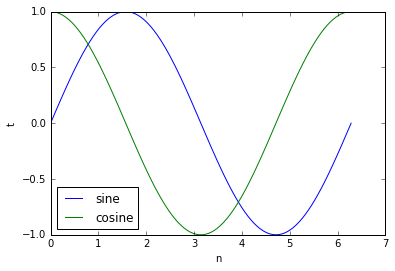

In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_sin():
    # Get the data.
    x  = np.linspace(0,2*np.pi,100)
    y1 = np.sin(x)
    y2 = np.cos(x)
    
    # Plot the data.
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(x, y1, label='sine')
    axes.plot(x, y2, label='cosine')
    
    # Arrange plot features for the end viewer.
    axes.set_xlabel('n')
    axes.set_ylabel('t')
    axes.legend(loc='best')  # this makes the legend appear where it covers the fewest data points
    
    return axes

my_axes = plot_sin()

-   Compose a function `plot_lines` which accepts a table `my_table`, a list of functions used to generate the table `my_funcs`, and a list of data set sizes used to generate the table `my_n`.  This function should plot each row of the table data against the data set sizes, with each line's label coming from the proper row in `my_funcs` (as above).  A representative line may look like:
        
        axes.plot(my_n, my_table[2], label=my_funcs[2])
    
    Label the x- and y-axes with `'n'` and `'t'` (as above).  The function should return the resulting `axes` (as above).

In [102]:
# Write your function here.  This includes any necessary import statements.
def plot_lines(my_table, my_funcs, my_n):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    
    for i in range(0, len(my_n)):
        axes.plot(my_n, my_table[i], label=my_funcs[i])
    
    axes.set_xlabel('n')
    axes.set_ylabel('t')
    axes.legend(loc='best')  # this makes the legend appear where it covers the fewest data points
    
    return axes

All tests passed successfully.


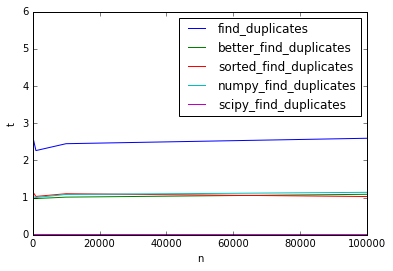

In [103]:
# it should pass this test---do NOT edit this cell
# these are worth five points
import matplotlib as mpl
from nose.tools import assert_equal, assert_is_not

test_axes = plot_lines(table, names, n)
plt.ylim(0, 6)
assert_equal(isinstance(test_axes, mpl.axes.Axes), True, msg="\nYour function does not return axes.")
assert_equal(len(test_axes.lines), 5, msg="\nYour plot does not have the correct number of lines.")
assert_is_not(len(test_axes.xaxis.get_label_text()), 0, msg="\nYour plot does not have labels on the x-axis.")
assert_is_not(len(test_axes.yaxis.get_label_text()), 0, msg="\nYour plot does not have labels on the y-axis.")
assert_equal(test_axes.legend_.get_visible(), True, msg="\nYour plot does not have a legend.")

print('All tests passed successfully.')

The underlying behavior can also be illuminated by changing the plot type from a linear scale (1, 2, 3, etc.) to a *logarithmic* scale (0.01, 0.1, 1, 10, 100, etc.). In other words, in the logarithmic scale, the range from 0.1 to 1 takes up the same space as the range from 1 to 10 in y-axis. In MatPlotLib, this can be accomplished by changing from using `plot` to using `loglog` (arguments stay the same).

-   Compose a function `plot_logs` which does the same as `plot_lines` above, but uses `loglog` instead.

In [104]:
# Write your function here.  This includes any necessary import statements.
def plot_lines(my_table, my_funcs, my_n):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    
    for i in range(0, len(my_n)):
        axes.loglog(my_n, my_table[i], label=my_funcs[i])
    
    axes.set_xlabel('n')
    axes.set_ylabel('t')
    axes.legend(loc='best')  # this makes the legend appear where it covers the fewest data points
    
    return axes

All tests passed successfully.


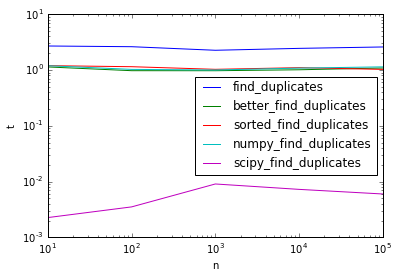

In [105]:
# it should pass this test---do NOT edit this cell
# these are worth five points
import matplotlib as mpl
from nose.tools import assert_equal, assert_is_not

test_axes = plot_logs(table, names, n)
assert_equal(isinstance(test_axes, mpl.axes.Axes), True, msg="\nYour function does not return axes.")
assert_equal(len(test_axes.lines), 5, msg="\nYour plot does not have the correct number of lines.")
assert_is_not(len(test_axes.xaxis.get_label_text()), 0, msg="\nYour plot does not have labels on the x-axis.")
assert_is_not(len(test_axes.yaxis.get_label_text()), 0, msg="\nYour plot does not have labels on the y-axis.")
assert_equal(test_axes.legend_.get_visible(), True, msg="\nYour plot does not have a legend.")
#assert_equal(test_result, ['a', 'b', 'd'], msg="\nYour plot is not logarithmic on the x-axis.")
#ax.set_yscale("log") 

print('All tests passed successfully.')

The log-log plot conveniently lets you predict how your algorithm will perform as you move to larger and larger problems by looking at the plot trend.

Such is the art of scaling.  You are equipped now to compare the behavior of various methods in your work, and to predict how that behavior will change as you move to bigger challenges and data sets.

### Bonus

Now let's rethink function `sorted_find_duplicates`: after the list is sorted, we know more about the structure of the data. So does it create any room for us to improve the logic in the `for` loop to make the algorithm run faster? If you have time left, please try this, and write a new function `sorted_find_duplicates2` that takes the same input parameter and returns a list of duplicated values as `sorted_find_duplicates`:

In [106]:
# Write your function here.  This includes any necessary import statements.
def sorted_find_duplicates2(values):
    duplicates = []
    
    values.sort()
    for i in range(0, len(values)):
        for j in range(i+1, len(values)):
            if values[i] == values[j] and values[j] not in duplicates:
                duplicates.append(values[j])
            else:
                break
            
    return duplicates

Now test your new function against the naive version `sorted_find_duplicate`

In [109]:
import numpy.random as npr
trial_values3 = npr.randint(0,10,size=1000)
print(trial_values3)
%timeit sorted_find_duplicates(trial_values3)
%timeit sorted_find_duplicates2(trial_values3)

[0 8 0 8 9 7 4 0 2 5 3 6 6 4 3 7 4 4 8 9 3 4 1 4 7 2 1 2 6 8 0 7 9 9 8 7 9
 8 4 3 6 2 3 8 3 5 1 0 5 1 8 5 7 8 0 4 4 5 1 5 3 2 0 9 4 9 2 6 6 3 8 8 1 8
 5 2 7 1 0 8 7 6 9 4 7 8 5 2 1 4 0 9 7 4 6 2 5 0 0 0 3 8 2 6 4 1 7 2 2 7 5
 9 0 1 5 8 0 8 0 7 8 7 1 1 1 7 0 9 7 5 1 3 8 0 4 4 6 9 4 0 0 0 2 8 9 7 3 9
 5 6 9 8 8 7 7 7 2 5 4 7 7 9 8 1 7 6 1 9 2 3 1 5 9 7 4 2 6 8 8 8 7 8 0 8 1
 4 6 6 2 9 9 9 5 7 2 3 8 8 9 8 1 6 4 0 1 6 9 0 5 0 1 5 1 7 6 4 9 1 6 7 6 7
 4 6 0 3 5 3 7 2 3 3 5 3 6 6 8 1 7 1 1 1 5 8 4 3 8 7 7 1 1 7 1 3 6 7 4 6 4
 1 1 6 8 7 0 9 2 6 3 7 6 4 8 0 7 0 8 0 6 3 1 2 0 0 4 0 3 0 9 3 3 3 3 3 0 0
 0 1 4 8 9 9 3 3 7 7 4 0 2 0 4 7 9 5 5 0 2 7 7 4 3 1 0 2 5 4 3 4 9 9 1 5 8
 1 1 6 5 9 1 6 4 6 0 9 0 4 1 2 6 8 0 2 5 4 8 5 7 6 2 8 5 7 2 4 2 7 4 2 4 1
 2 8 1 3 9 5 0 2 0 3 3 3 7 1 9 0 2 7 4 9 7 6 5 8 2 4 2 7 7 6 7 1 1 9 0 6 0
 8 1 4 0 6 1 3 7 8 6 4 5 6 3 3 1 1 9 7 8 8 1 1 3 3 2 0 2 1 1 7 1 9 2 2 2 0
 4 5 0 8 0 0 2 9 5 4 0 7 0 6 7 5 5 2 1 5 5 2 9 0 5 0 7 2 3 4 3 6 6 1 4 1 9
 9 8 7 6 0 3 2 9 9 1 3 3 